In [104]:
import pandas as pd
import numpy as np

%matplotlib inline

## Lydon's Dataset

In [105]:
rest=pd.read_csv("restaurant.csv")

In [106]:
rest.isnull().sum()

id                   0
facility_name        0
num                801
street               6
city                 7
state                7
zip                  7
municipal            3
category_cd          0
description          0
p_code              27
fdo                 44
bus_st_date         67
bus_cl_date      19246
seat_count       11537
noroom           24490
sq_feet          14781
status               0
placard_st        9948
x                 6651
y                 6651
address              0
dtype: int64

In [107]:
food= rest[['id', 'facility_name', 'city', 'zip']]

In [108]:
food.isnull().sum()

id               0
facility_name    0
city             7
zip              7
dtype: int64

In [109]:
#I decided to delete the rows that have a missing city or zipcode, because there are only 14 of them and about 
#25,500 overall entries I do not think it will skew the results or anything.
food["city"].fillna("Unknown", inplace=True)
food["zip"].fillna("0", inplace=True)
food = food[food['zip'] != 0]
food = food[food['city'] != "Unknown"]

In [110]:
food.isnull().sum()

id               0
facility_name    0
city             0
zip              0
dtype: int64

In [111]:
#Get rid of entries where the city is not Pittsburgh 
food= food[food['city'] == "Pittsburgh"]

In [112]:
#Look at the different zipcodes to see which one has the most food options
food['zip'].value_counts()

15222.0    1406
15212.0    1085
15213.0     947
15219.0     919
15237.0     824
15205.0     668
15206.0     624
15203.0     586
15235.0     548
15210.0     498
15221.0     484
15236.0     434
15224.0     429
15217.0     427
15201.0     400
15216.0     391
15238.0     341
15227.0     325
15220.0     321
15202.0     299
15215.0     289
15241.0     263
15231.0     252
15234.0     252
15226.0     245
15218.0     244
15208.0     236
15232.0     227
15228.0     225
15239.0     222
15209.0     215
15223.0     176
15229.0     161
15207.0     145
15275.0     144
15233.0     136
15214.0     136
15211.0     114
15204.0      99
15243.0      68
15261.0      48
15225.0      36
15282.0      31
15260.0       9
15276.0       7
15240.0       5
15230.0       3
15242.0       3
15244.0       1
15259.0       1
Name: zip, dtype: int64

In [113]:
list=food['zip'].unique()
print(len(list))

50


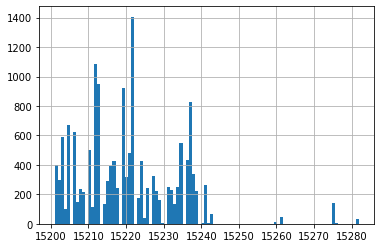

In [114]:
#This is a visualization of the above data, which is a good way of showing that 15222 does have the most food
#options in Pittsburgh
food["zip"].hist(bins=100)

Based on the above information, the best neighborhood to live in based on the amount of food options (restaurants, bars, and supermarkets) is 15222 (the Troy Hill neighborhood) which encompasses Downtown Pittsburgh. Amount of food options is a good measure of bestness, because people want to live in a neighborhood where there is a lot going on, and lots of people like to go out to bars and restaurants so food options seems like a perfect things to look at when measuring "bestness".

## Allison's Dataset

In [115]:
# the dataset being used in this program file is WPRDC Property Assessment Data
homes = pd.read_csv("https://data.wprdc.org/datastore/dump/518b583f-7cc8-4f60-94d0-174cc98310dc")
homes = homes[homes['PROPERTYCITY'] == "PITTSBURGH"]



In [116]:
homes.groupby(['PROPERTYZIP']).sum()

,PROPERTYHOUSENUM,MUNICODE,SCHOOLCODE,OWNERCODE,CLASS,USECODE,LOTAREA,SALEPRICE,PREVSALEPRICE,PREVSALEPRICE2,...,TAXYEAR,MUNICIPALITY,NEIGHBORHOOD,PGH_COUNCIL_DISTRICT,PGH_WARD,PGH_PUBLIC_WORKS_DIVISION,PGH_POLICE_ZONE,PGH_FIRE_ZONE,TRACT,BLOCK_GROUP
PROPERTYZIP,,,,,,,,,,,,,,,,,,,,,
15068.0,3974.0,1760,62,22,0.0,20,75260,9.500000e+04,7.000000e+04,50000.0,...,4040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15116.0,203.0,944,34,10,0.0,10,14714,1.000000e+00,0.000000e+00,0.0,...,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15120.0,0.0,115,47,21,0.0,850,414952,0.000000e+00,0.000000e+00,0.0,...,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15131.0,2040.0,875,23,20,0.0,352,178731,6.000000e+05,2.860000e+04,0.0,...,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15147.0,550.0,4670,150,54,0.0,50,34536,1.859010e+05,9.740100e+04,1.0,...,10100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15201.0,17940965.0,775348,334499,93302,0.0,714097,58218430,1.096647e+09,4.605857e+08,178349679.0,...,14376340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15202.0,5579517.0,6473663,161349,96694,0.0,563667,121856520,7.325558e+08,3.147554e+08,157311523.0,...,15893360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15203.0,6879372.0,700902,282470,80904,0.0,819505,32044820,9.873201e+08,4.081278e+08,160694865.0,...,12140200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15204.0,8376925.0,583744,222737,62545,0.0,568413,47909910,2.317107e+08,7.523797e+07,36821206.0,...,9580860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
homes['CHANGENOTICEADDRESS4'].isnull().sum()


4314

In [118]:
homes['CHANGENOTICEADDRESS4'].fillna("0", inplace=True)
homes = homes[homes['CHANGENOTICEADDRESS4'] != 0]

In [119]:
#'changenoticeaddress4' is the column name of the zip code where the person
#who used to own the land for sale moved to
homes['CHANGENOTICEADDRESS4'].value_counts()

15237.0    17836
15219.0    17498
15235.0    14772
15236.0    11991
15227.0    10789
           ...  
19380.0        1
19373.0        1
80906.0        1
19365.0        1
32771.0        1
Name: CHANGENOTICEADDRESS4, Length: 4964, dtype: int64

In [120]:
print(len(homes[homes['CHANGENOTICEADDRESS4'] == '15213.0']))
print(len(homes[homes['CHANGENOTICEADDRESS4'] == '15224.0']))

0
0


In [121]:
list2=homes['CHANGENOTICEADDRESS4'].unique()
print(len(list2))

4964


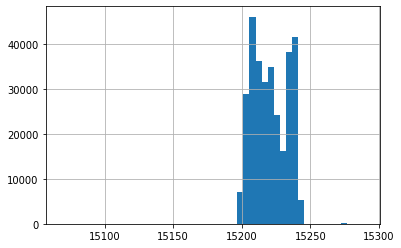

In [122]:
homes['PROPERTYZIP'].hist(bins=50)

A dataset that shows where people moved in the Pittsburgh area is a good metric to use for determining the best neighborhood. If more people are moving somewhere, that generally means that they are moving there to live in a better way. You can tell both from the data valuecounts() function and the data visualization that both 15237 (which includes McCandless and Ross Township) and 15219 (which includes the hill district, middle hill, and more) are very close to the same number of people moving to those areas. Therefore, through this metric, both the 15237 neighborhoods and the 15219 neighborhoods are the best when it comes to housing.

# Helena's Dataset

In [123]:
hospital=pd.read_csv("hospitals.csv")

In [124]:
hospitals = hospital[['Facility', 'Address', 'Y', 'X']]

In [125]:
hospitals.isnull().sum()

Facility    0
Address     0
Y           0
X           0
dtype: int64

In [126]:
hospitals["zipCode"] = hospitals["Address"].str.split().str[-1]

In [127]:
hospitals["zipCode"].value_counts()

15146    3
15213    2
15143    2
15224    2
15136    1
15241    1
15025    1
15243    1
15202    1
15232    1
15261    1
15065    1
15132    1
15212    1
15215    1
15237    1
15238    1
15219    1
Name: zipCode, dtype: int64

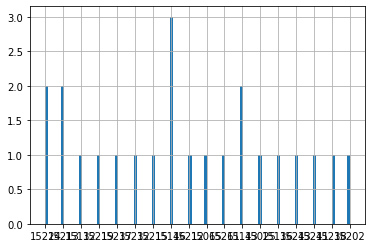

In [128]:
hospitals["zipCode"].hist(bins=100)

Based on the data gathered, the best information to live in based on number of hospitals accessible is Monroeville, PA which houses three hospitals. The number of hospitals is a good measure of bestness because it shows the value placed on healthcare and safety for the residents.

In [129]:
foodList=[]
for i in food['zip']:
    foodList.append(i) if i not in foodList else foodList

In [130]:
homeList=[]
for i in homes['CHANGENOTICEADDRESS4']:
    homeList.append(i) if i not in homeList else homeList

In [131]:
#Combining zipcodes that home and food datasets have in common
homeFood = []
for element in homeList:
    if element in foodList:
        homeFood.append(element)
print(homeFood)

[15219.0, 15222.0, 15243.0, 15220.0, 15213.0, 15233.0, 15205.0, 15237.0, 15217.0, 15228.0, 15208.0, 15241.0, 15232.0, 15238.0, 15203.0, 15282.0, 15236.0, 15206.0, 15235.0, 15239.0, 15216.0, 15221.0, 15218.0, 15202.0, 15215.0, 15230.0, 15234.0, 15227.0, 15212.0, 15207.0, 15210.0, 15226.0, 15201.0, 15229.0, 15224.0, 15211.0, 15204.0, 15275.0, 15260.0, 15223.0, 15214.0, 15209.0, 15244.0, 15259.0, 15242.0, 15240.0, 15225.0, 15231.0, 15276.0, 15261.0]


In [132]:
#The original value list did not have 0's at the end of each zipcode so I added these in by hand so that they
#could be compared
hospitalList= []
hospitalList= [15146.0, 15143.0, 15213.0, 15224.0, 15215.0, 15243.0, 15237.0, 15219.0, 15241.0, 15132.0, 15261.0, 
              15025.0, 15065.0, 15136.0, 15238.0, 15232.0, 15212.0, 15202.0]
print(hospitalList)

[15146.0, 15143.0, 15213.0, 15224.0, 15215.0, 15243.0, 15237.0, 15219.0, 15241.0, 15132.0, 15261.0, 15025.0, 15065.0, 15136.0, 15238.0, 15232.0, 15212.0, 15202.0]


In [133]:
#Printing out values that are in all 3 columns
result= []
for a in homeFood:
    if a in hospitalList:
        result.append(a)
print(result)

[15219.0, 15243.0, 15213.0, 15237.0, 15241.0, 15232.0, 15238.0, 15202.0, 15215.0, 15212.0, 15224.0, 15261.0]


In [134]:
#We have decided to place the highest priority on safety and healthcare, so we are going to eliminate the 
#zipcodes that only have 1 hospital and keep the ones that have more than 1
updated_result=[15213.0, 15224.0]
print(updated_result)

[15213.0, 15224.0]


In [139]:
#num1 is the number of times 15213 appears in homes
num1=0
#num2 is the number of times 15224 appears in homes
num2=0
for i in homes['CHANGENOTICEADDRESS4']:
    if(i== 15213.0):
        num1= num1+1
    if(i== 15224.0):
        num2= num2+1
print(num1)       
print(num2)

3946
3085


In [140]:
#Below are dictionaries which were occasionally helpful to refer to throughout the project

In [135]:
zipCountHome=dict()
for i in homes['CHANGENOTICEADDRESS4']:
        if(i in zipCountHome.keys()):
                # IF WORD ALREADY EXIST
                # INCREASE COUNT BY 1
                zipCountHome[i] = zipCountHome[i]+1
            # IF WORD NOT IN LIST
            # CREATE WORD KEY WITH VALUE 1
        else:
            zipCountHome[i] = 1

In [134]:
zipCountFood=dict()
for i in list:
    if(i in zipCountFood.keys()):
            # IF WORD ALREADY EXIST
            # INCREASE COUNT BY 1
                zipCountFood[i] = zipCountFood[i]+1
            # IF WORD NOT IN LIST
            # CREATE WORD KEY WITH VALUE 1
    else:
        zipCountFood[i] = 1

In [135]:
print(zipCountFood)

{'15224': 2, '15213': 2, '15132': 1, '15219': 1, '15237': 1, '15232': 1, '15215': 1, '15146': 3, '15212': 1, '15065': 1, '15261': 1, '15143': 2, '15025': 1, '15136': 1, '15243': 1, '15241': 1, '15238': 1, '15202': 1}


In [161]:
zipCountHospital= dict()
for i in hospitals["zipCode"]:
    if(i in zipCountHospital.keys()):
        zipCountHospital[i]= zipCountHospital[i]+1
    else:
        zipCountHospital[i]=1

In [162]:
print(zipCountHospital)

{'15224': 2, '15213': 2, '15132': 1, '15219': 1, '15237': 1, '15232': 1, '15215': 1, '15146': 3, '15212': 1, '15065': 1, '15261': 1, '15143': 2, '15025': 1, '15136': 1, '15243': 1, '15241': 1, '15238': 1, '15202': 1}


# For 15213

Hospital Count= 2

Food Count = 947

Home Count= 3946

Total Count= 3946+ 947+2= 4895

# For 15224

Hospital Count = 2

Food Count= 429

Home Count= 3085

Total Count= 2+429+ 3085= 3516

# Conclusion
Overall, the best neightborhood to live in based on our metrics which includes homes, food (supermarkets, restaurants, and hospitals is 15213 (Oakland). We decided that homes and food were good factors to look at, because they are big factors that people look into when deciding to move to a new neighborhood because people want to be able to go out and have supermarkets near by as well as a palce to live. In addition, hospitals were an important factor because people need access to healthcare especially with our current pandemic. The biggest factor in determining this was our determination that the best neighborhood would have more than 1 hospital (which is especially prevalent during this time). The first and third highest values that had more than hospital were located in Allegheny County, and not necessarily Pittsburgh so they were not featured in our other datasets. Therefore we took a closer look at the 15213 and 15224 zipcodes and based on adding up the amount of hospitals, food options, and home counts we determined that Oakland was the best neighborhood to live in.